In [36]:
import torch
import matplotlib.pyplot as plt
import matplotlib

In [135]:
NUMBER_OF_NEURONS = 40
NUMBER_OF_EPOCHS = 10000
LEARNING_RATE = 0.01
NUMBER_OF_VALUES = 300
MAX_MIN_VALUE = 25
MAX_NOISE = 0.7

matplotlib.rcParams['figure.figsize'] = (15., 5.)

In [136]:
def func(x):
    return x*torch.sin(x)

In [137]:
def centering(x):
    return x * 2 * MAX_MIN_VALUE - MAX_MIN_VALUE

In [138]:
def add_noise(x):
    noise = torch.randn(y_train.shape)*MAX_NOISE
    return x + noise

In [139]:
x_train = torch.rand(NUMBER_OF_VALUES)
x_train = centering(x_train)

y_train = func(x_train)
y_train = add_noise(y_train)

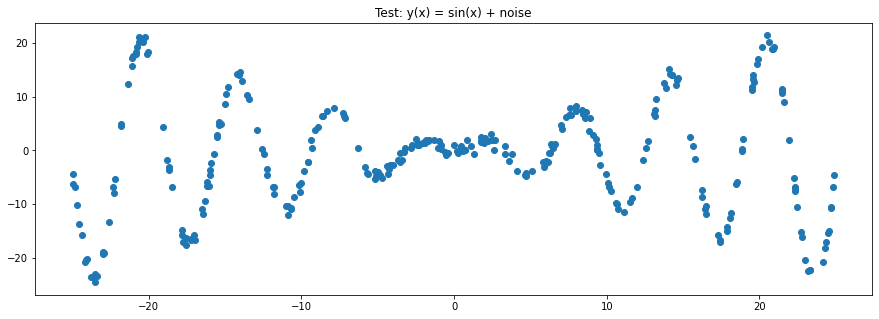

In [140]:
plt.plot(x_train, y_train , 'o')
plt.title('Test: y(x) = sin(x) + noise');

In [141]:
x_train.unsqueeze_(1);
y_train.unsqueeze_(1);

In [142]:
x_validation = torch.linspace(-MAX_MIN_VALUE, MAX_MIN_VALUE, NUMBER_OF_VALUES)

y_validation = func(x_validation)

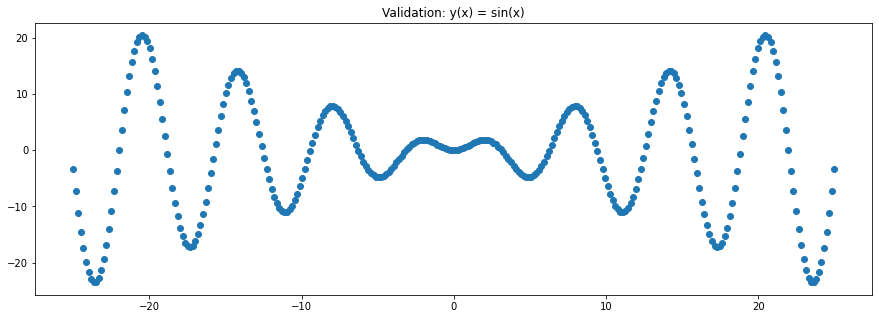

In [143]:
plt.plot(x_validation, y_validation , 'o')
plt.title('Validation: y(x) = sin(x)');

In [144]:
x_validation.unsqueeze_(1);
y_validation.unsqueeze_(1);

In [145]:
class FuncNet(torch.nn.Module):
    def __init__(self, n_neurons):
        super(FuncNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
func_net = FuncNet(NUMBER_OF_NEURONS)

In [146]:
optimazer = torch.optim.Adam(func_net.parameters(), lr=LEARNING_RATE)

In [147]:
def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()

In [157]:
for epoch in range(NUMBER_OF_EPOCHS):
    optimazer.zero_grad()
    
    y_pred = func_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    
    loss_val.backward()
    optimazer.step()

In [158]:
def predict(net, x):
    return net.forward(x)

In [159]:
x_test = torch.rand(NUMBER_OF_VALUES)
x_test = centering(x_test)
x_test.unsqueeze_(1)

y_prediction = predict(func_net, x_test)

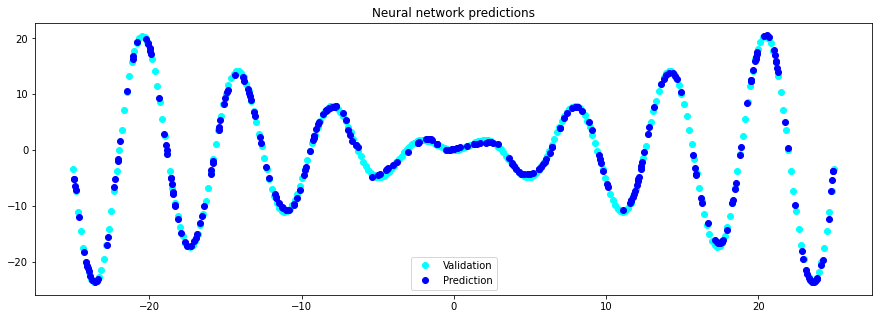

In [160]:
plt.plot(x_validation, y_validation, 'o', c='aqua', label='Validation')
plt.plot(x_test.numpy(), y_prediction.data.numpy(), 'o', c='blue', label='Prediction')
plt.legend(loc='lower center')
plt.title('Neural network predictions');